In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importing the modules
___

In [3]:
# Readig the file and creating the dataframe
df = pd.read_csv('datasets/steam.csv')
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


# Important variables:

The important variables in this dataset are:
* require_age - To investigate the relationship between required age and game popularity.
* Categories - Popular categories.
* Genres - To identify popular genres.
* Achievements - To determine if achievements influence game popularity.
* positive_ratings and negative_ratings - To analyze the popularity of games in relation to the other variables.
* Average_playtime - To discover which genres capture players' time the most.
* Owners - To determine how many people purchased or added the game to their library.
* Price - To find a median price among popular games in popular categories.
___

In [4]:
# Checking if there are NaN values that could affect the analysis
df.isna().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

Note: Since the NaN values in the variables 'publisher' and 'developer' won't affect the analysis, we don't need to process them.
___

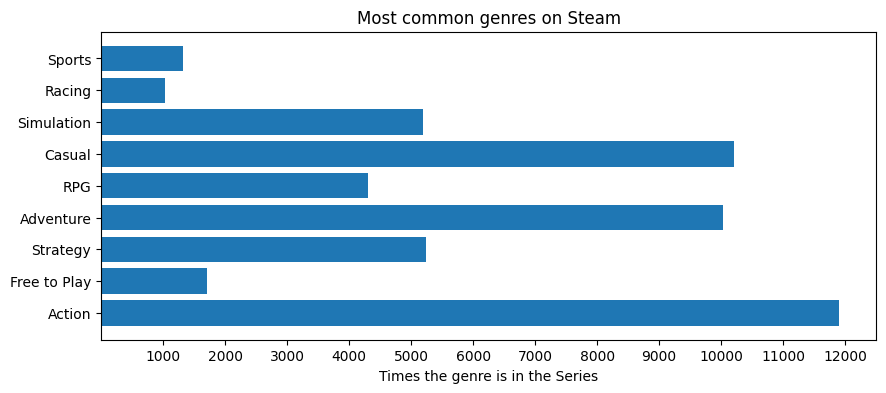

[('Indie', 19421), ('Action', 11903), ('Casual', 10210), ('Adventure', 10032), ('Strategy', 5247), ('Simulation', 5194), ('RPG', 4311), ('Early Access', 2954), ('Free to Play', 1704), ('Sports', 1322), ('Racing', 1024), ('Violent', 843), ('Massively Multiplayer', 723), ('Gore', 537), ('Nudity', 266), ('Sexual Content', 245), ('Utilities', 146), ('Design & Illustration', 87), ('Animation & Modeling', 79), ('Education', 51), ('Video Production', 38), ('Software Training', 31), ('Audio Production', 29), ('Web Publishing', 28), ('Game Development', 17), ('Photo Editing', 12), ('Accounting', 6), ('Documentary', 1), ('Tutorial', 1)]


In [5]:
# Counting every time a genre is in the Series
genres_dict = {}
for genre in df['genres'].str.split(';'):
    for element in genre:
        if element in genres_dict.keys():
            genres_dict[element] += 1
        else:
            genres_dict[element] = 1

# Creating a dictionary with only the most common genres
top_10_dict = {}
for genre in genres_dict:
    if genres_dict[genre] >= 1024:
        top_10_dict[genre] = genres_dict[genre]
# Popping two variables that don't add to the insights
top_10_dict.pop('Early Access')
top_10_dict.pop('Indie')

# Generating the Horizontal Bar Chart
fig, ax = plt.subplots(figsize=(10, 4))
x = list(top_10_dict.values())
y = list(top_10_dict.keys())
ax.barh(y, x)
ax.set_title('Most common genres on Steam')
ax.set_xticks(np.arange(1000, 12001, 1000))
ax.set_xlabel('Times the genre is in the Series')
plt.show()

# Printing for a detailed reading.
print(sorted(genres_dict.items(), key=lambda x:x[1], reverse=True))

# What are the most common genres published on Steam?
|Genre|Times|
|-|-|
|1. Action|11903|
|2. Casual|10210|
|3. Adventure|10032|
|4. Strategy|5247|
|5. Simulation|5194|
|6. RPG|4311|
|7. Free to Play|1704|
|8. Sports|1322|
|9. Racing|1024|

Note: 'Early Acess' and 'Indie' were dropped since they don't add to the analysis.
___

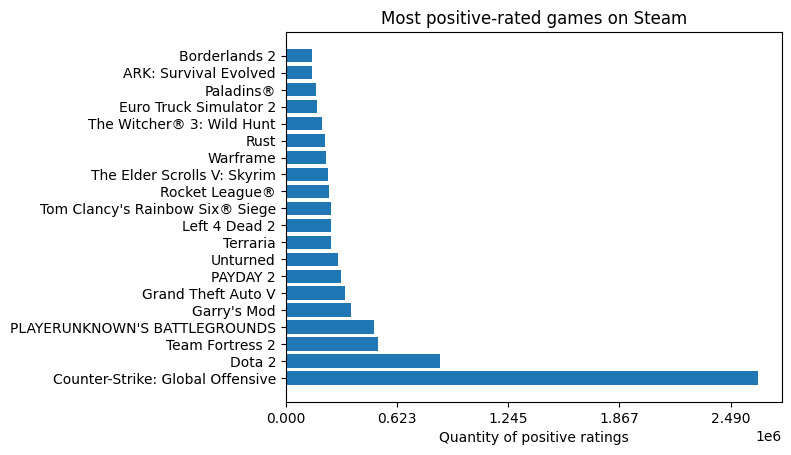

In [6]:
# Selecting the columns to graph, sorting them, and taking the top 20 games
select = df[['positive_ratings', 'name']]
select = select.sort_values(by=['positive_ratings'], ascending=False)
select = select.head(20)

# Creating the graph
fig, ax = plt.subplots()
x = select['positive_ratings']
y = select['name']
ax.barh(y, x)
ax.set_title('Most positive-rated games on Steam')
ax.set_xticks(np.arange(0, 2650001, 622500))
ax.set_xlabel('Quantity of positive ratings')
plt.show()

# What are the most positive-rated games on Steam?

|Game| Positive-ratings|
| - | - |
|1. Counter-Strike: Global Offensive|2644404|
|2. Dota 2|863507|
|3. Team Fortress 2|515879|
|4. PLAYERUNKNOWN'S BATTLEGROUNDS|496184|
|5. Garry's Mod|363721|
|6. Grand Theft Auto V|329061|
|7. PAYDAY 2|308657|
|8. Unturned|292574|
|9. Terraria|255600|
|10. Left 4 Dead 2|251789|
|11. Tom Clancy's Rainbow Six® Siege|251178|
|12. Rocket League®|242561|
|13. The Elder Scrolls V: Skyrim|237303|
|14. Warframe|226541|
|15. Rust|220370|
|16. The Witcher® 3: Wild Hunt|202930|
|17. Euro Truck Simulator 2|176769|
|18. Paladins®|169580|
|19. ARK: Survival Evolved|145035|
|20. Borderlands 2|144595|
___

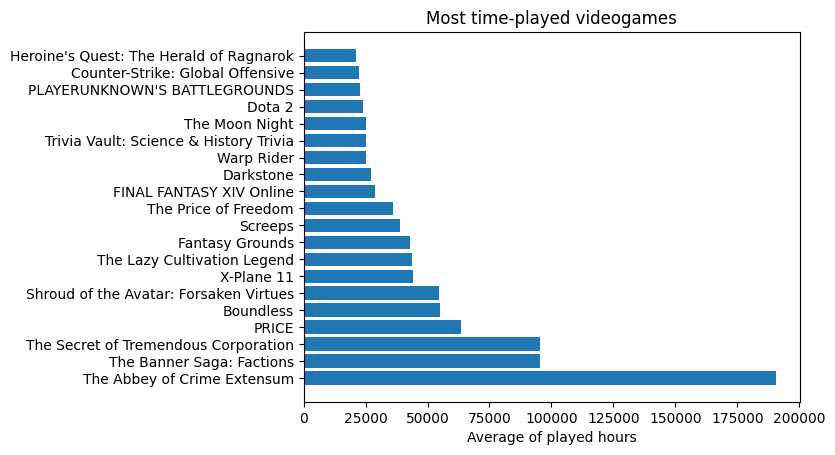

In [7]:
# Selecting the columns to graph, sorting them, and taking the top 20 games 
select = df[['name', 'average_playtime']]
select = select.sort_values(by=['average_playtime'], ascending=False)
select = select.head(20)
# Replacing the name of the game since it creates conflicts due to the language
select = select.replace(to_replace='懒人修仙传', value='The Lazy Cultivation Legend')

# Creating the graph
fig, ax = plt.subplots()
x = select['average_playtime']
y = select['name']
ax.barh(y, x)
ax.set_title('Most time-played videogames')
# ax.set_xticks(np.arange(0, 2650001, 622500))
ax.set_xlabel('Average of played hours')
plt.show()

# What are the most time-played videogames?
|Game|Average of played hours|
|-|-|
|1. The Abbey of Crime Extensum|190625|
|2. The Banner Saga: Factions|95245|
|3. The Secret of Tremendous Corporation|95242|
|4. PRICE|63481|
|5. Boundless|55204|
|6. Shroud of the Avatar: Forsaken Virtues|54618|
|7. X-Plane 11|44169|
|8. The Lazy Cultivation Legend|43632|
|9. Fantasy Grounds|43074|
|10. Screeps|38805|
|11. The Price of Freedom|36029|
|12. FINAL FANTASY XIV Online|28897|
|13. Darkstone|27375|
|14. Warp Rider|25324|
|15. Trivia Vault: Science & History Trivia|25322|
|16. The Moon Night|25317|
|17. Dota 2|23944|
|18. PLAYERUNKNOWN'S BATTLEGROUNDS|22938|
|19. Counter-Strike: Global Offensive|22494|
|20. Heroine's Quest: The Herald of Ragnarok|21247|
___

count    27075.000000
mean         6.078193
std          7.874922
min          0.000000
25%          1.690000
50%          3.990000
75%          7.190000
max        421.990000
Name: price, dtype: float64


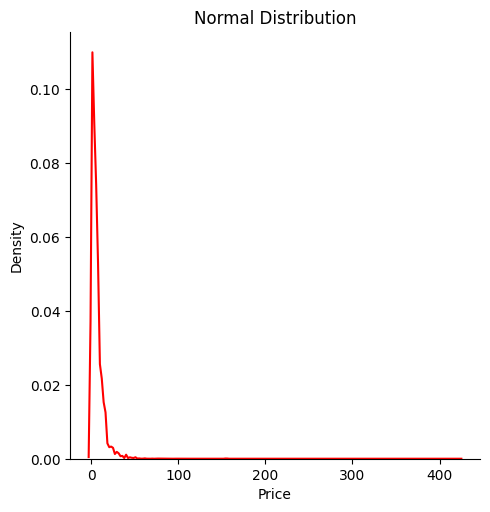

In [8]:
# Selecting the data to work with
select = df['price']
print(select.describe())

# Creating the graph for a normal distribution
sns.displot(select, kind='kde', color='red')
plt.xlabel('Price')
plt.title('Normal Distribution')
plt.show()

# How are the prices distributed?

Most prices are distributed on the left side, hence the majority of the games are relatively cheap. we can find the mean on 6.078193 dollars
___

C:\Users\FurAsgardr\AppData\Local\Temp\ipykernel_20520\1765320337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[:, 'ratings'] = select.loc[:, 'positive_ratings'].sub(select.loc[:, 'negative_ratings'])


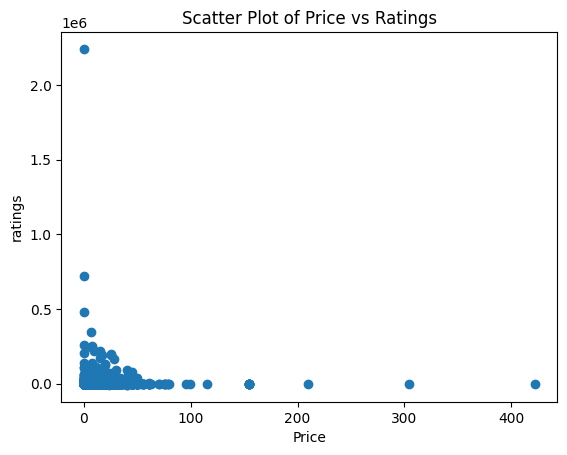

Correlation coefficient 0.02919563041669859


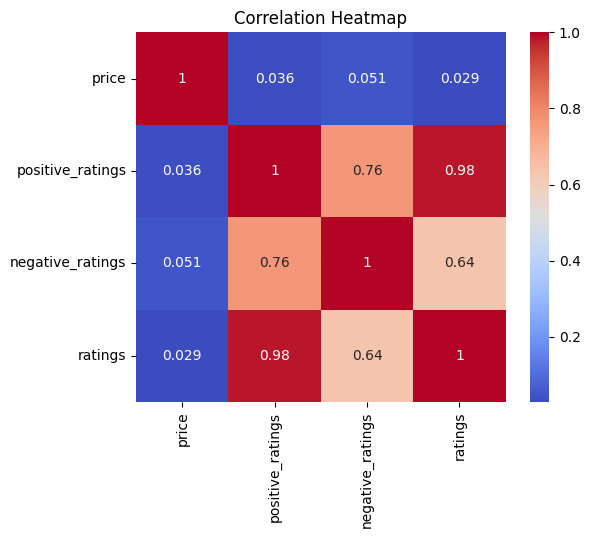

In [10]:
# Selecting the data to work with
select = df[['price', 'positive_ratings', 'negative_ratings']]
select.loc[:, 'ratings'] = select.loc[:, 'positive_ratings'].sub(select.loc[:, 'negative_ratings'])

# Generating a scatter graph
plt.scatter(select['price'], select['ratings'])
plt.xlabel('Price')
plt.ylabel('ratings')
plt.title('Scatter Plot of Price vs Ratings')
plt.show()

# Calculating the correlation between the price and the positive ratings
correlation = select['price'].corr(select['ratings'])
print('Correlation coefficient', correlation)

# Creating a matrix based on the correlation of price and positie ratings, then, creating a heatmap
correlation_matrix = select.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Is there a correlation between the price and the ratings?

It seems that there is no relation between the prices and the ratings based on the correlations coefficient, heatmap and the scatterplot.
___

C:\Users\FurAsgardr\AppData\Local\Temp\ipykernel_20520\740481558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select.loc[:, 'ratings'] = select.loc[:, 'positive_ratings'].sub(select.loc[:, 'negative_ratings'])


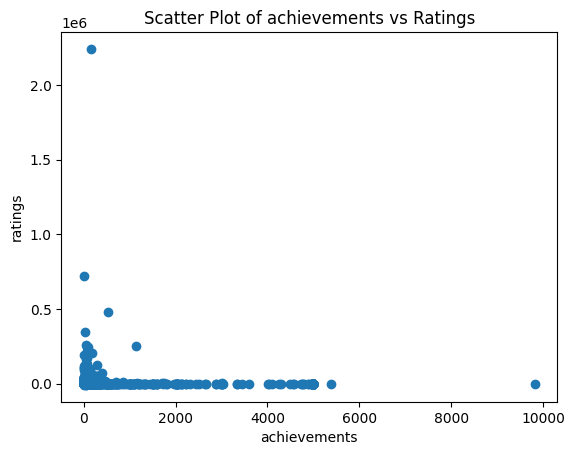

Correlation coefficient 0.006246626948645402


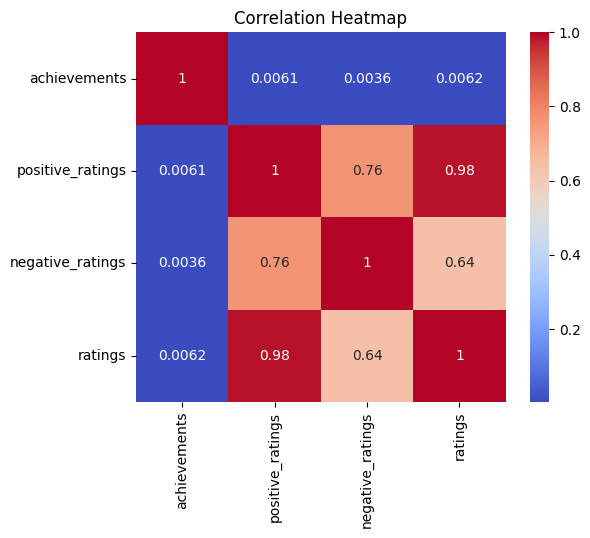

In [11]:
# Selecting the data to work with
select = df[['achievements', 'positive_ratings', 'negative_ratings']]
select.loc[:, 'ratings'] = select.loc[:, 'positive_ratings'].sub(select.loc[:, 'negative_ratings'])

# Generating a scatter graph
plt.scatter(select['achievements'], select['ratings'])
plt.xlabel('achievements')
plt.ylabel('ratings')
plt.title('Scatter Plot of achievements vs Ratings')
plt.show()

# Calculating the correlation between the achievements and the positive ratings
correlation = select['achievements'].corr(select['ratings'])
print('Correlation coefficient', correlation)

# Creating a matrix based on the correlation of achievements and positie ratings, then, creating a heatmap
correlation_matrix = select.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Is there a correlation between the achievements system and the ratings?

It seems that there is no relation between the achievements system and the ratings based on the correlations coefficient, heatmap and the scatterplot.
___